1.1 Pandas로 데이터 다루기

In [1]:
# 아래의 데이터를 사용
import seaborn as sns
import pandas as pd
import numpy as np
# seaborn에서 데이터 로드를 위한 코드
titanic = sns.load_dataset('titanic')

1.1.1데이터에 대한 정보 확인하기

In [2]:
# 테이블 형태의 데이터를 데이터프레임으로 읽었을 때,
# 어떤 형태의 데이터로 이루어져 있는지 확인하고 싶을 때,
# df.head() 또는 df.tail()을 사용한다.

titanic.head() # 처음부터 5번째까지 보여준다.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.tail() # 마지막으로 5번째까지 보여준다.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


- survived 생존 여부:0 = 사망, 1 = 생존
- pclass : 티켓의 선실 등급 : 1 = 일등석, 2 = 이등석, 3 = 삼등석
- sex : 탑승자 성별
- age : 탑승자 나이
- sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
- parch : 같이 탑승한 부모님 또는 어린이 인원수
- fare : 요금
- embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton
- class : 선실 등급
- who : 탑승자 성별
- deck: 데크
- embark_town: 탑승 항구
- alive: 생존여부
- alone: 혼자인지 여부

In [4]:
# 데이터프레임의 행의 개수, 열의 개수, 각 컬럼별 타입 등
# 데이터프레임에 대한 기본적인 정보를 확인하고 싶을 때
# df.info()를 사용한다.

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
# 데이터프레임에 대한 컬럼별 기본적인 통계값을 확인하고 싶을 때
# 실수값에 대한 통계값을 확인할 수 있으며, 다른 타입에 대한 통계값은 확인할 수 없다.
# df.describe()를 사용한다.

titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
len(titanic)

891

In [7]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [8]:
titanic.pclass.nunique() # or len(titanic.pclass.unique())

3

In [9]:
# df.sum()을 통해서
# titanic의 age 컬럼의 전체 합을 구할 수 있다.
titanic.age.sum()

21205.17

In [10]:
# df.count()를 통해서
# titanic 전체 컬럼별 데이터 개수를 셀 수 있다.
# Nan(결측치)는 제외하고 센다.
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [11]:
# titanic의 age 컬럼에서 최고령자를 확인
titanic.age.max()

80.0

In [12]:
# titanic의 age 컬럼에서 최연소자를 확인
titanic.age.min()

0.42

In [13]:
# titanic의 age 컬럼에서 평균 나이를 확인
titanic.age.mean()

29.69911764705882

In [14]:
# titanic의 age 컬럼에서 데이터가 기댓값으로부터 얼마나 떨어져 있는지 알 수 있다.
# ver : variance
titanic.age.var()

211.0191247463081

In [15]:
# titamin의 age 컬럼에서 데이터의 산포도를 확인할 수 있다.
# std : standard deviation
titanic.age.std()

14.526497332334044

In [16]:
# titanic의 age 컬럼에서 중간 나이를 구할 수 있다.
titanic.age.median()

28.0

In [17]:
# titanic의 age 컬럼에서 분위수를 구할 수 있다.
titanic.age.quantile(0.5) # 2사분위수, 중간값을 구할 수 있다.

28.0

1.1.2 데이터 정렬하기

In [18]:
# 값을 가지고 정렬할 때는 df.sort_values()를 이용한다.
# 'by' 파라미터를 통해서 어떤 컬럼을 가지고 정렬할지 정할 수 있다.

titanic.sort_values(by=['age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [19]:
# 한개의 기준만을 가지고 정렬하는 것이 아니라 여러 개의 기주를 가지고 정렬할 수도 있다.
titanic.sort_values(by=['age', 'fare'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,1,female,NaN,0,0,110.8833,C,First,woman,False,NaN,Cherbourg,yes,True
334,1,1,female,NaN,1,0,133.6500,S,First,woman,False,NaN,Southampton,yes,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
527,0,1,male,NaN,0,0,221.7792,S,First,man,True,C,Southampton,no,True


In [20]:
# 역순으로 정렬하는 것도 가능하다.
titanic.sort_values(by='age', ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [21]:
# 인덱스를 가지고 정렬할 때는 df.sort_index()를 사용한다.
titanic.sort_index()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [22]:
# 역순으로 정렬하는 것도 가능하다.
titanic.sort_index(ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [23]:
# 컬럼의 이름 정렬하는 것도 가능
titanic.sort_index(axis=1)

,adult_male,age,alive,alone,class,deck,embark_town,embarked,fare,parch,pclass,sex,sibsp,survived,who
0,True,22.0,no,False,Third,NaN,Southampton,S,7.2500,0,3,male,1,0,man
1,False,38.0,yes,False,First,C,Cherbourg,C,71.2833,0,1,female,1,1,woman
2,False,26.0,yes,True,Third,NaN,Southampton,S,7.9250,0,3,female,0,1,woman
3,False,35.0,yes,False,First,C,Southampton,S,53.1000,0,1,female,1,1,woman
4,True,35.0,no,True,Third,NaN,Southampton,S,8.0500,0,3,male,0,0,man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,27.0,no,True,Second,NaN,Southampton,S,13.0000,0,2,male,0,0,man
887,False,19.0,yes,True,First,B,Southampton,S,30.0000,0,1,female,0,1,woman
888,False,NaN,no,False,Third,NaN,Southampton,S,23.4500,2,3,female,1,0,woman
889,True,26.0,yes,True,First,C,Cherbourg,C,30.0000,0,1,male,0,1,man


1.1.3 데이터 합치기

In [24]:
# titanic 데이터가 컬럼기준으로 2개의 데이터프레임으로 나눠져 있다고 생각해보자.
df1=titanic.iloc[:, :len(titanic.columns)//2]
df2=titanic.iloc[:, len(titanic.columns)//2:]

In [25]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [26]:
df2.head()

,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,S,Third,man,True,NaN,Southampton,no,False
1,C,First,woman,False,C,Cherbourg,yes,False
2,S,Third,woman,False,NaN,Southampton,yes,True
3,S,First,woman,False,C,Southampton,yes,False
4,S,Third,man,True,NaN,Southampton,no,True


In [27]:
# 이러한 경우에 2개의 데이터를 합칠 때, pd.concat(..., axis=1)을 사용하면 된다.
pd.concat([df1, df2], axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [28]:
# 이번에는 titanic 데이터가 행기준으로 2개의 데이터프레임으로 나눠져 있다고 생각해보자.
df1=titanic.iloc[:len(titanic)//2]
df2=titanic.iloc[len(titanic)//2:]

In [29]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
445,1,1,male,4.0,0,2,81.8583,S,First,child,False,A,Southampton,yes,False
446,1,2,female,13.0,0,1,19.5000,S,Second,child,False,NaN,Southampton,yes,False
447,1,1,male,34.0,0,0,26.5500,S,First,man,True,NaN,Southampton,yes,True
448,1,3,female,5.0,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
449,1,1,male,52.0,0,0,30.5000,S,First,man,True,C,Southampton,yes,True


In [31]:
# 이러한 경우에 2개의 데이터를 합칠 때, pd.concat(..., axis=0)을 사용하면 된다.
pd.concat([df1, df2], axis=0)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [32]:
# 아래의 데이터를 사용
df1=pd.DataFrame([['A', 1], ['B', 2], ['C', 3]], columns=['x1', 'x2'])
df2=pd.DataFrame([['A', 'T'], ['B', 'F'], ['D', 'T']], columns=['x1', 'x3'])

In [33]:
df1.head()

,x1,x2
0,A,1
1,B,2
2,C,3


In [34]:
df2.head()

,x1,x3
0,A,T
1,B,F
2,D,T


In [35]:
# pd.merge() 메소드의 'how' 파리미터를 통해서 어떠한 방식으로 join할지
# 그리고 'on' 파리미터를 통해서 어떤 것을 키로 사용할 지 정할 수 있다.

# 'how='inner'', 'on='x1'' 파라미터로 설정하면, 
# x1를 기준으로 inner join을 한다.
# inner join은 키값이 일치하는 경우에만 병합한다.
pd.merge(df1, df2, how='inner', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [36]:
# 'how='outer'', 'on='x1'' 파라미터로 설정하면,
# x1 기준으로 outer join을 한다.
# outer join은 키값이 존재하는 모든 것을 합치고, 없는 데이터의 경우 결측치로 처리한다.
pd.merge(df1, df2, how='outer', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [37]:
# 'how='left'', 'on='x1'' 파라미터로 설정하면,
# x1 기준으로 left outter join을 한다.
# left outer join은 왼쪽 데이터의 기준으로 합치고, 없는 데이터의 경우 결측치로 처리한다.
pd.merge(df1, df2, how='left', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [38]:
# 'how='right'', 'on='x1'' 파라미터로 설정하면,
# x1 기준으로 right outter join을 한다.
# left outer join은 오른쪽 데이터의 기준으로 합치고, 없는 데이터의 경우 결측치로 처리한다.
pd.merge(df1, df2, how='right', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


1.1.4 피봇테이블과 그룹핑

1.1.4.1 피봇테이블

In [39]:
data = {
    "도시":["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도":["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구":[9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203 ],
    "지역":["수도권","수도권","수도권","경상권","경상권","경상권","수도권","수도권"]
}
columns=["도시", "연도", "인구", "지역"]
df1=pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [40]:
df1.pivot("도시", "연도", "인구")

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


1.1.4.2 그룹핑

In [41]:
# 타이타닉 데이터를 사용
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
# df.describe()를 통해서 기본적인 통계값을 확인했을 때 처럼
# 그룹핑을 한 후에 describe() 메소드를 적용해서 키값 기준으로 기본적인 통계값을 볼 수도 있다.
titanic.groupby(by='sex').describe().T

sex                 female        male
survived count  314.000000  577.000000
         mean     0.742038    0.188908
         std      0.438211    0.391775
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      1.000000    0.000000
         max      1.000000    1.000000
pclass   count  314.000000  577.000000
         mean     2.159236    2.389948
         std      0.857290    0.813580
         min      1.000000    1.000000
         25%      1.000000    2.000000
         50%      2.000000    3.000000
         75%      3.000000    3.000000
         max      3.000000    3.000000
age      count  261.000000  453.000000
         mean    27.915709   30.726645
         std     14.110146   14.678201
         min      0.750000    0.420000
         25%     18.000000   21.000000
         50%     27.000000   29.000000
         75%     37.000000   39.000000
         max     63.000000   80.000000
sibsp    count  314.000000  577.000000
         mean     0.694268    0.429809
         std      1.156520    1.061811
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      8.000000    8.000000
parch    count  314.000000  577.000000
         mean     0.649682    0.235702
         std      1.022846    0.612294
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      6.000000    5.000000
fare     count  314.000000  577.000000
         mean    44.479818   25.523893
         std     57.997698   43.138263
         min      6.750000    0.000000
         25%     12.071875    7.895800
         50%     23.000000   10.500000
         75%     55.000000   26.550000
         max    512.329200  512.329200

In [43]:
# 성별을 기준으로 age의 평균값을 구하고 싶다면, 그룹핑을 하면 쉽게 구할 수 있다.
titanic.groupby(by='sex').age.mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [44]:
# 2개를 기준으로 그룹핑도 할 수 있다.
# 성별과 객실 등급을 기준으로 age의 평균값을 구할 수도 있다.
titanic.groupby(by=['sex', 'pclass']).age.mean()

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [45]:
# 성별과 객실 등급을 기준으로 age의 최댓값과 age의 최솟값을 뺀 연산도 할 수 있다.
# 이 경우 사용자가 함수를 직접 정의해서 agg() 메소드 또는 apply() 메소드레 인자로 집어넣으면 된다.
def max_min_diff(item):
    return item.max() - item.min()

titanic.groupby(by=['sex', 'pclass']).age.agg(max_min_diff)

sex     pclass
female  1         61.00
        2         55.00
        3         62.25
male    1         79.08
        2         69.33
        3         73.58
Name: age, dtype: float64

In [46]:
titanic.groupby(by=['sex', 'pclass']).age.apply(max_min_diff)

sex     pclass
female  1         61.00
        2         55.00
        3         62.25
male    1         79.08
        2         69.33
        3         73.58
Name: age, dtype: float64

1.2 Pandas를 이용한 시각화

- line
- bar, barh : 세로, 가로 막대
- hist, kde : historgram(도수 분포의 상태를 막대 모양으로 표현한 그래프), 커넬 정밀도 추정(KDE, KernelDensity Estimate)그래프
- box : Box-and-Whisker, 데이터의 집합의 범위와 중앙값을 확인
- pie : 파이 모양의 원형 그래프
- scatter : 산포 그래프
- area, hexbin

<AxesSubplot:xlabel='sex'>

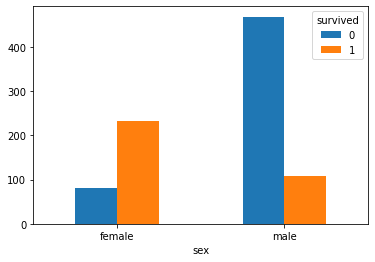

In [47]:
# 타이타닉 데이터를 사용해서 성별에 따른 생존 수 확인(세로)
titanic.groupby(by=['sex', 'survived']).size().unstack().plot(kind='bar', rot=0)

<AxesSubplot:ylabel='sex'>

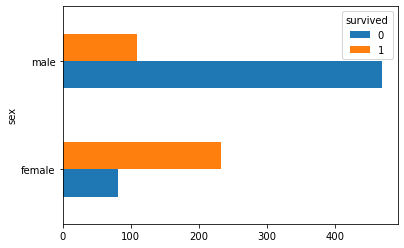

In [48]:
# 타이타닉 데이터를 사용해서 성별에 따른 생존 수 확인(가로)
titanic.groupby(by=['sex', 'survived']).size().unstack().plot(kind='barh', rot=0)

<AxesSubplot:ylabel='Frequency'>

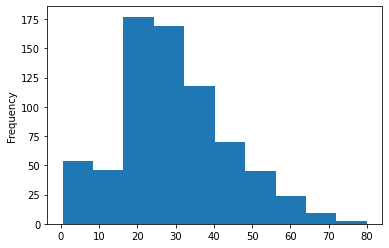

In [49]:
# 타이타닉 데이터를 사용해서 age 변수 빈도수 확인
titanic.age.plot(kind='hist')

<AxesSubplot:ylabel='Density'>

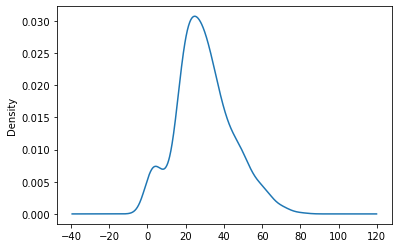

In [50]:
# 타이타닉 데이터를 사용해서 age 변수 빈도 수 확인
# 히스토그램보다 부드러운 형태의 분포 곡선을 보여준다.
titanic['age'].plot(kind='kde')

<AxesSubplot:>

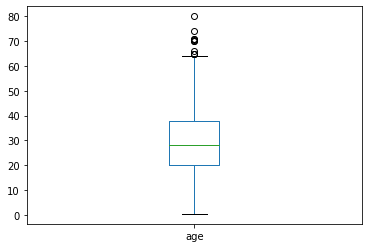

In [51]:
# 타이타닉 데이터를 사용해서 age 변수 빈도 수 확인
titanic['age'].plot(kind='box')

<AxesSubplot:ylabel='None'>

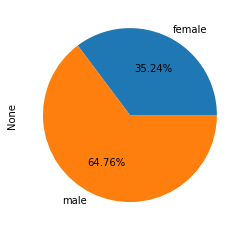

In [52]:
# 타이타닉 데이터를 사용해서 성별 비율 확인
titanic.groupby(by='sex').size().plot(kind='pie', autopct='%1.2f%%')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

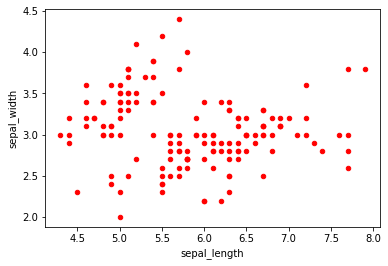

In [53]:
# 불꽃 데이터를 사용해서 꽃받침의 길이와 꽃받침의 크기에 따른 산포도 확인
# scatter(x, y, s=None, c=None), s=마커의 크기, c=마커의 색상
iris = sns.load_dataset("iris")
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='red')